# Python Ka chilla with BABA AAMMAR 

## Instructor: Dr. Aammar Tufail
## PArticipant: Dilshad Raza

# **Classification and Regressin in Python**
- There are different types of Algorithm
- "Decision Tree ALgorithm"
  - Splits due to entropy gain(info)
  - Class labels are assigned on a Leaf node
  - Slight change in the data set changes the whole tree 
  - It is sensitive to the Training Data
    - therefore our model fails to generalize the data
    - sensitivity, any input value---> prediction(effected)

- How to solve this:
  - Making Multiple random decision trees=> Forest

# **Random Forest Classification and Regressin in Python**
- Random Forest Model:
  - Less Sensitive to the Training Data

1. Creating multiple datasets from main data
   - Same number of rows
   - Random sampling and replacing (Bootstraping)

- Train Data sets on each data set independently
  - use few features to train the data

**BOOTSTRAPING**

|x1|x2|y|
|----|---|---|
|2|4|8|
|3|6|18|
|4|2|8|
|5|2|10|



- Bootstraping is basically randomization of the data sets into their columns/variables during training as shown below:


|x1|x1|x1|
|----|---|---|
|2|3|2|
|3|4|2|
|3|5|3|
|4|5|3|

- same for x2:


|x2|x2|x2|
|----|---|----|
|4|6|4|
|6|4|2|
|2|2|6|
|2|6|6|

2. Use few Features to train the data
3. Prediction on the basis of Aggregation(Democracy) Jamhooriyat

- if we have categorical Classification data
  - Then it is random forest classifier
- if we have numerical data
  - Then it is random forest regresser


**Random Forest = (Vootstraping + Aggregation)--> BAGGING**

- VI Point: Why it is called Random?----> (Bootstraping + Random Feature Selection)
- Randomizes the relationship b/w trees
  - if we dont use random features, all trees will act very similarly (Variance increases)

  - Some trees will give us bad results while some will give us good results so they will cancel out each other giving us one jsut as 3/3 = 1
- Ideal size of feature subset?
  - squareroot of total number of features or

- **RANDOM FOREST FOR REGRESSION**
  - aggregation step:
    - take the mean at this stage


- **Advantages:**
  - robust model
  - highly accurate vs decision tree
  - less overfitting or not a problem
    - it takes average or mode
  - can be used for both classification and regression analysis (Aggregation step (take mean fro regression and mode for classification))
  - also can get relative feature information
- **COns:**
  - so many decision trees
  - so many sub samples
  - prediction will be slow
  - high computation
  - high cost
  - hard to interpret

RF vs DTs
- RF is more accurate than DTs


# Hands on Training with Random Forest Model:

In [1]:
# import sample data and libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
X = df.iloc[ : ,:-1]
y= df.iloc[ : ,-1:]

In [7]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X,y)
model.predict([[10,4,2,3]])

C:\Users\mrloo\AppData\Local\Temp/ipykernel_1576/951398303.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X,y)
C:\Users\mrloo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['setosa'], dtype=object)

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)

predictions = model.predict(X_test)
predictions

array(['virginica', 'setosa', 'virginica', 'versicolor', 'setosa',
       'setosa', 'setosa', 'virginica', 'virginica', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'versicolor'], dtype=object)

In [9]:
# accuracy test

score = model.score(X_test, y_test)
print("the accuracy score is:", score)

the accuracy score is: 1.0


In [10]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test,predictions))

Accuracy: 1.0


In [11]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
cm

array([[ 8,  0,  0],
       [ 0, 14,  0],
       [ 0,  0,  8]], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score:1.0')

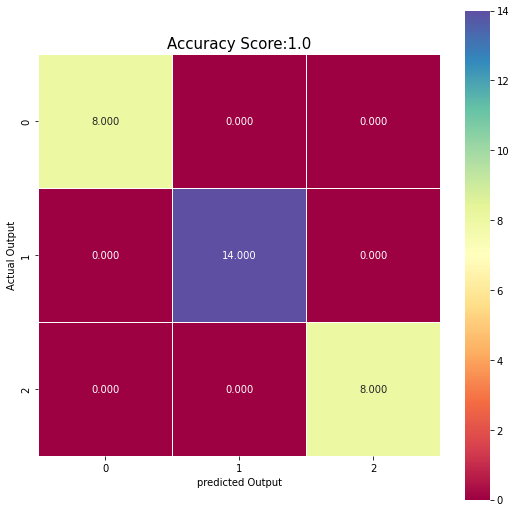

In [16]:
plt.figure(figsize= (9,9))

sns.heatmap(cm, annot=True, fmt ='.3f', linewidths = .5, square = True, cmap ='Spectral');
plt.ylabel("Actual Output");
plt.xlabel('predicted Output');
all_sample_title = "Accuracy Score:{0}".format(score)
plt.title(all_sample_title, size =15)